## Regresión logística multinomial

Regresión logística multinomial es una categórica condicional para clasificación multiclase,
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid f(\boldsymbol{x};\boldsymbol{\theta})),$$
de logits lineales con la entrada,
$$\boldsymbol{a}=f(\boldsymbol{x};\boldsymbol{\theta})=\mathbf{W}\boldsymbol{x}+\boldsymbol{b},%
\quad\mathbf{W}\in\mathbb{R}^{C\times D},\,\boldsymbol{b}\in\mathbb{R}^C$$

**Ejemplo:** $\,D=2,\,\boldsymbol{x}\in[0, 1]^D,\,C=4,%
\,\mathbf{W}=\begin{pmatrix}1 &1\\-1&1\\-1&-1\\1&-1\end{pmatrix},%
\,\boldsymbol{b}=\boldsymbol{0}_C$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x_min = y_min = -1.0
x_max = y_max = 1.0
x, y = np.meshgrid(np.linspace(x_min, x_max, num=1000), np.linspace(y_min, y_max, num=1000))
W = np.array([[1., 1.], [-1., 1.], [-1., -1.], [1., -1.]])
b = np.array([.0, .0, .0, .0])

Cálculo de logits y posteriors:

In [3]:
from scipy.special import logsumexp

C, D = W.shape
X = np.squeeze(np.dstack([np.ravel(x), np.ravel(y)]))
aT1 = X @ W.T + b
T = .01 # temperatura próxima a cero para hallar posteriors cercanos a argmax
a = aT1 / T
p = np.exp(a-logsumexp(a, axis=1).reshape(-1, 1))

Logits por clase:

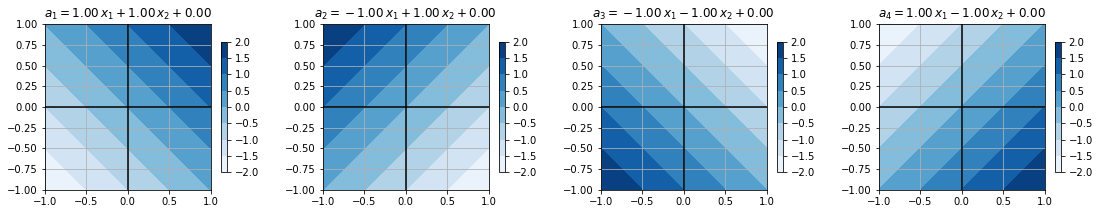

In [4]:
fig, axes = plt.subplots(1, C, figsize=(4*C, 4))
fig.tight_layout(pad=4)
for j in np.arange(0, C):
    ax = axes[j]
    ax.set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('$a_{:}={:.2f}\,x_1{:+.2f}\,x_2{:+.2f}$'.format(j+1, W[j, 0], W[j, 1], b[j]))
    cp = ax.contourf(x, y, aT1[:, j].reshape(x.shape), cmap='Blues')
    plt.colorbar(cp, ax=axes[j], shrink=0.7)

Posteriors por clase con softmax atemperada:

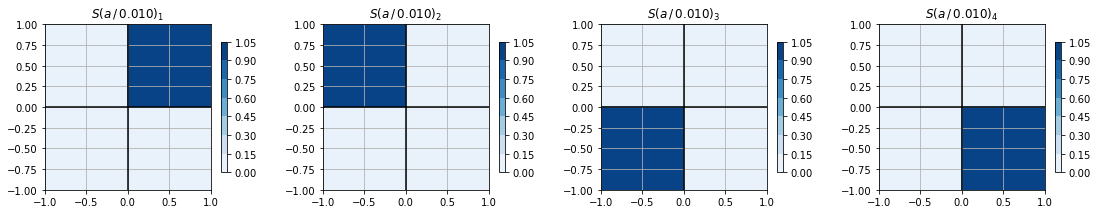

In [5]:
fig, axes = plt.subplots(1, C, figsize=(4*C, 4))
fig.tight_layout(pad=4)
for j in np.arange(0, C):
    ax = axes[j]
    ax.set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('$S(a\,/\,{:.3f})_{:}$'.format(T, j+1))
    cp = ax.contourf(x, y, p[:, j].reshape(x.shape), cmap='Blues')
    plt.colorbar(cp, ax=axes[j], shrink=0.7)